In [ ]:
import spacy
import pandas as pd
import numpy as np
import re
import string
from wordcloud import STOPWORDS
import os

In [ ]:
class DataPreprocessing():
    # python -m spacy download en_core_web_sm
    _nlp = spacy.load('en_core_web_sm')
    _punctuations= "?:!.,;"
    _stop_words = ["https", "ul", "-", " ", ".", "org", "wiki", "wikipedia", "will", "image", "s", "t", "m", "ve", "u", "said", \
                    "code", "span", "container", "imgur", "html", "jpg", "png", "jpeg", "nofollow", "quot",  "comment", \
                    "site", "SE", "tags", "comments", "moderators", "answers", "posts", "stackoverflow", "amp", "strike", \
                    "chat", "edit", "alt", "link", "exchange", "help", "votes", "noreferrer", "closed", "png", "h1", "new", \
                    "stackexchange", "class","users","questions", "topic", "meta", "stack", "href", "tag", "p", "em", "rel", \
                    "li", "user", "answer", "title", "h3", "moderator", "post", "vote", "blockquote", "strong","tagged", \
                    "question", "img", "page", '"', "\n"] + list(STOPWORDS)
        
    def process(self, data):
        # Lowercase
        data = data.lower()
        data = re.sub(' +', ' ', data)
        data = data.translate(str.maketrans('', '', string.punctuation + '"'))
        doc = self._nlp(data)

        # Tokenization and lemmatization 
        lemma_list = []
        for token in doc:
            lemma_list.append(token.lemma_)

        # Filter the stopword
        filtered_sentence = [] 
        for word in lemma_list:
            lexeme = self._nlp.vocab[word]
            if lexeme.is_stop == False and word not in self._stop_words:
                filtered_sentence.append(word) 

        # Remove punctuation
        for word in filtered_sentence:
            if word in self._punctuations:
                filtered_sentence.remove(word)
        
        return " ".join(filtered_sentence)

In [ ]:
dataPreprocessing = DataPreprocessing()

In [ ]:
liar_train = pd.read_table("/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/data/LIAR/train.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
liar_test = pd.read_table("/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/data/LIAR/test.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
liar_valid = pd.read_table("/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/data/LIAR/valid.tsv", names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

In [ ]:
labels = np.unique(liar_train.label).tolist()
labels

['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']

In [ ]:
!mkdir /content/local/
!rsync -av --progress /content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/ /content/local/ --exclude TextGAN-PyTorch/save 

sending incremental file list
./
NLP_Project_1___Fake_News_Detection.pdf
      8,193,541 100%   34.90MB/s    0:00:00 (xfr#1, to-chk=306/308)
PoC document.md
          2,841 100%    5.71kB/s    0:00:00 (xfr#2, to-chk=305/308)
README.md
          1,098 100%    1.46kB/s    0:00:00 (xfr#3, to-chk=304/308)
data_preprocessing_bert.ipynb
         94,017 100%   94.17kB/s    0:00:00 (xfr#4, to-chk=303/308)
preliminary_analysis.ipynb
     10,366,916 100%    7.26MB/s    0:00:01 (xfr#5, to-chk=302/308)
presentation.pdf
      8,323,796 100%   11.57MB/s    0:00:00 (xfr#6, to-chk=301/308)
references.md
          1,333 100%    1.44kB/s    0:00:00 (xfr#7, to-chk=300/308)
word2vec_LSTM.ipynb
         17,041 100%   15.51kB/s    0:00:01 (xfr#8, to-chk=299/308)
word2vec_simple DNN.ipynb
         15,872 100%   12.20kB/s    0:00:01 (xfr#9, to-chk=298/308)
.ipynb_checkpoints/
TextGAN-PyTorch/
TextGAN-PyTorch/.gitignore
          1,258 100%    0.00kB/s    0:00:00 (xfr#10, to-chk=291/308)
TextGAN-PyTorch/LICENS

In [ ]:
def write_data(train_data, test_data, count):  
  with open(f"/content/local/TextGAN-PyTorch/dataset/docs_cat{count}.txt", "w") as output:
      output.write(train_data)
  with open(f"/content/local/TextGAN-PyTorch/dataset/testdata/docs_cat{count}_test.txt", "w") as output:
      output.write(test_data)

In [ ]:
with open("/content/local/TextGAN-PyTorch/dataset/docs.txt", "w") as output:
    output.write(".\n".join(statement for statement in liar_train.statement.tolist()).replace("'", ""))

with open("/content/local/TextGAN-PyTorch/dataset/testdata/docs_test.txt", "w") as output:
    output.write(".\n".join(statement for statement in liar_test.statement.tolist()).replace("'", ""))


In [ ]:
with open("/content/local/TextGAN-PyTorch/dataset/docs.txt", "w") as output:
    all_data = [dataPreprocessing.process(statement) for statement in liar_train.statement.tolist()]
    all_data_filtered = filter(lambda x: len(x)>1, all_data)
    output.write(".\n".join(all_data_filtered).replace("'", ""))

with open("/content/local/TextGAN-PyTorch/dataset/testdata/docs_test.txt", "w") as output:
    all_data = [dataPreprocessing.process(statement) for statement in liar_test.statement.tolist()]
    all_data_filtered = filter(lambda x: len(x)>1, all_data)
    output.write(".\n".join(all_data_filtered).replace("'", ""))

In [ ]:
for count, label in enumerate(labels):
  train_text_data_for_label = ".\n".join(statement for statement in liar_train[liar_train["label"] == label].statement.tolist()).replace("'", "")
  test_text_data_for_label = ".\n".join(statement for statement in liar_test[liar_test["label"] == label].statement.tolist()).replace("'", "")
  write_data(train_text_data_for_label, test_text_data_for_label, count)

In [ ]:
for count, label in enumerate(labels):
  train_text_data_for_label = [dataPreprocessing.process(statement) for statement in liar_train[liar_train["label"] == label].statement.tolist()]
  test_text_data_for_label = [dataPreprocessing.process(statement) for statement in liar_test[liar_test["label"] == label].statement.tolist()]
  train_text_data_for_label_filtered = filter(lambda x: len(x)>1, train_text_data_for_label)
  test_text_data_for_label_filtered = filter(lambda x: len(x)>1, test_text_data_for_label)

  write_data(".\n".join(train_text_data_for_label_filtered).replace("'", ""), ".\n".join(test_text_data_for_label_filtered).replace("'", ""), count)

In [ ]:
!sudo apt-get install libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-all-dev is already the newest version (1.71.0.0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
!pip install kenlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.0/425.0 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kenlm: filename=kenlm-0.1-cp38-cp38-linux_x86_64.whl size=3005176 sha256=4fd5e0f278784704e2ccb2c96f4ed1d0e166dcf92d4cba35f6ce86f670d7e3c4
  Stored in directory: /root/.cache/pip/wheels/d4/3c/44/389ed64995f0e7382ab7c38ef13e57fb1a5e5e111350ce6807
Successfully built kenlm


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 824777859961521315
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 40213086208
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12840779883011119668
 physical_device_desc: "device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
 xla_global_id: 416903419]

In [ ]:
!cd /content/local/TextGAN-PyTorch/ && python3 main.py --run_model="sentigan" \
--dataset="docs"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
> training arguments:
>>> if_test: True
>>> run_model: sentigan
>>> k_label: 6
>>> dataset: docs
>>> model_type: vanilla
>>> loss_type: rsgan
>>> mu_type: ragan
>>> eval_type: Ra
>>> d_type: Ra
>>> if_real_data: True
>>> cuda: True
>>> device: 0
>>> devices: 0
>>> shuffle: False
>>> gen_init: truncated_normal
>>> dis_init: uniform
>>> n_parent: 1
>>> eval_b_num: 8
>>> lambda_fq: 1.0
>>> lambda_fd: 0.0
>>> d_out_mean: True
>>> freeze_dis: False
>>> freeze_clas: False
>>> use_all_real_fake: False
>>> use_population: False
>>> samples_num: 10000
>>> vocab_size: 10382
>>> mle_epoch: 50
>>> clas_pre_epoch: 20
>>> adv_epoch: 20
>>> inter_epoch: 15
>>> batch_size: 64
>>> max_seq_len: 324
>>> start_letter: 1
>>> padding_idx: 0
>>> gen_lr: 0.01
>>> gen_adv_lr: 0.0001
>>> dis_lr: 0.0001
>>> clip_norm: 5.0
>>> pre_log_step: 1
>>> adv_log_step: 1
>>> train_data: dataset/docs.txt
>>> test_

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import ast

title_dict = {
    'gen_pre_loss': 'pre_loss',
    'gen_adv_loss': 'g_loss',
    'gen_mana_loss': 'mana_loss',
    'gen_work_loss': 'work_loss',
    'c_loss' : 'c_loss',
    'c_acc' : 'c_acc',
    'dis_loss': 'd_loss',
    'dis_train_acc': 'train_acc',
    'dis_eval_acc': 'eval_acc',
    'NLL_oracle': 'NLL_oracle',
    'NLL_gen': 'NLL_gen',
    'BLEU-[2, 3, 4, 5]': 'BLEU-[2, 3, 4, 5]',
}

color_list = ['#e74c3c', '#e67e22', '#f1c40f', '#8e44ad', '#2980b9', '#27ae60', '#16a085']

labels = ['barely-true', 'false', 'half-true', 'mostly-true', 'pants-fire', 'true']
def plt_data(data, step, title, c_id, savefig=False):
    x = [int(i) for i in range(len(data[0]))]
    # plt.plot(x, data, label="catGAN train accuracy wihtout preprocessing")
    # plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    # plt.xlabel("epochs")
    # plt.ylabel("accuracy")

    bleu_score_dict = defaultdict(list)
 
    for scores in data:
      for index, score in enumerate(scores):
        bleu_score_dict[labels[index]].append(score[0])

    fig=plt.figure()
    plt.title("sentiGAN BLEU score")

    for key, bleu_score in bleu_score_dict.items():
      plt.plot(range(0, len(bleu_score)), bleu_score, label=key)
      plt.xlabel('epoch')
      plt.ylabel('BLEU score')
    plt.legend(loc='upper left', prop={'size': 6})


    plt.show()
    if savefig:
        fig.savefig('/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/TextGAN-PyTorch/savefig/' + title + '.png', dpi=400)


def get_log_data(filename):
    with open(filename, 'r') as fin:
        all_lines = fin.read().strip().split('\n')
        data_dict = { 'BLEU-[2, 3, 4, 5]': []}

        for line in all_lines:
            try:
                for key in data_dict.keys():
                    if key in line:
                        data_dict[key].append(ast.literal_eval(line.split(key)[1].split("=")[1].split("NLL_gen")[0][1:-2]))
            except:
                break

    return data_dict

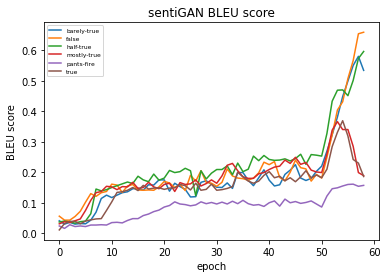

In [ ]:
log_file_root = '/content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/TextGAN-PyTorch/log/'
# Custom your log files in lists, no more than len(color_list)
log_file_list = ['sentigan-with-preprocessing']
legend_text = ['sentigan-bleu']

color_id = 0
data_name = 'BLEU-[2, 3, 4, 5]'
if_save = True
# legend_text = log_file_list

assert data_name in title_dict.keys(), 'Error data name'

all_data_list = []
for idx, item in enumerate(log_file_list):
    log_file = log_file_root + item + '.txt'

    # get data from log file
    all_data = get_log_data(log_file)
    plt_data(all_data[title_dict[data_name]], len(all_data[title_dict[data_name]]),
              legend_text[idx], color_id, if_save)
    color_id += 1

plt.show()


In [ ]:
all_data

In [ ]:
!yes | cp -rf /content/local/TextGAN-PyTorch /content/drive/MyDrive/PROJECTS/Fake_News-Sentimental_Scrapers/